First we are importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

Importing Data from given github link to our Data Frame

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Our Dataset is having 7752 Rows & 25 Columns

In [4]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Many columns are having missing values

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

The Date columns is of Object Data Type and rest columns are of Float Data Types

We are going to fill the missing values of Date & Station with the with the first Mode of the respective columns.

In [6]:
df['Date'].fillna(df['Date'].mode().iloc[0],inplace=True)

In [7]:
df['station'].fillna(df['station'].mode().iloc[0],inplace=True)

In [8]:
df.isna().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

For rest of the columns, we are filling the missing values by the Mean of the respective columns.

In [9]:
df.fillna(df.mean(),inplace=True)

In [10]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now no missing values are there in our Dataset.

In [11]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We are converting the Date feature from Object data type to Datetime format by using pandas datetime method.

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Now we are going to extract Day, Month & Year separately from the Date Feature.

In [14]:
df['Day']=df['Date'].dt.strftime('%d')

In [15]:
df['Month']=df['Date'].dt.strftime('%m')

In [16]:
df['Year']=df['Date'].dt.strftime('20%y')

In [17]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,06,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,06,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,06,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,06,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,06,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,08,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,08,2017
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,08,2017
7750,1.0,2013-01-07,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,07,01,2013


In [18]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                         object
Month                       object
Year                        object
dtype: object

Our Day, Month & Year are extracted separately, but it is of object datatype, so we are converting the same to Integer data type for making these readable for our ML model.

In [19]:
df['Day']=df['Day'].astype(int)

In [20]:
df['Month']=df['Month'].astype(int)

In [21]:
df['Year']=df['Year'].astype(int)

In [22]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,8,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,8,2017
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,8,2017
7750,1.0,2013-01-07,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,7,1,2013


In [23]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                          int32
Month                        int32
Year                         int32
dtype: object

After getting date separately as integer, we are going to drop our Date column.

In [24]:
df.drop(['Date'], axis=1, inplace=True)

In [25]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,8,2017
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,7,1,2013


As we have to predict 2 target variables (1) Next Day's Maximum Tempreture & (2) Next Day's Minimum Tempreture, we are shifting these 2 variables at the last columns of the dataset.

In [26]:
target1=df.pop('Next_Tmax')

In [27]:
df.shape

(7752, 26)

In [28]:
df.insert(26, 'Next_Tmax', target1)

In [29]:
target2=df.pop('Next_Tmin')

In [30]:
df.insert(26, 'Next_Tmin', target2)

In [31]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,30,6,2013,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30,6,2013,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,30,6,2013,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,30,6,2013,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,30,6,2013,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,30,8,2017,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,30,8,2017,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,30,8,2017,27.8,17.4
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,7,1,2013,17.4,11.3


In [32]:
df.shape

(7752, 27)

In [33]:
dfcor=df.corr()

In [34]:
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax,Next_Tmin
station,1.000000,0.112756,0.132068,-0.066780,-0.166391,0.069306,0.105009,0.004234,-0.133787,0.006728,...,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.000488,0.001165,0.000607,0.108236,0.128659
Present_Tmax,0.112756,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,-0.143687,-0.000920,0.059904,0.610348,0.622741
Present_Tmin,0.132068,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,-0.107934,-0.002666,0.037785,0.471806,0.796670
LDAPS_RHmin,-0.066780,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.065874,-0.054004,-0.002104,-0.437898,0.095019
LDAPS_RHmax,-0.166391,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.195798,0.025667,0.177168,0.219599,0.149261,-0.012640,-0.039080,-0.141341,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069306,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.042093,0.090666,-0.178895,-0.162332,0.047971,-0.160142,-0.021304,0.016358,0.827189,0.586868
LDAPS_Tmin_lapse,0.105009,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,-0.177728,-0.027000,-0.004447,0.586983,0.880176
LDAPS_WS,0.004234,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.029842,-0.082910,-0.112214,-0.342729,-0.096576
LDAPS_LH,-0.133787,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,0.133221,0.025822,0.055133,0.086781,-0.047384,-0.012420,-0.023506,0.056656,0.157616,-0.055440
LDAPS_CC1,0.006728,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.020263,-0.076507,-0.066621,-0.452541,-0.011028


<AxesSubplot:>

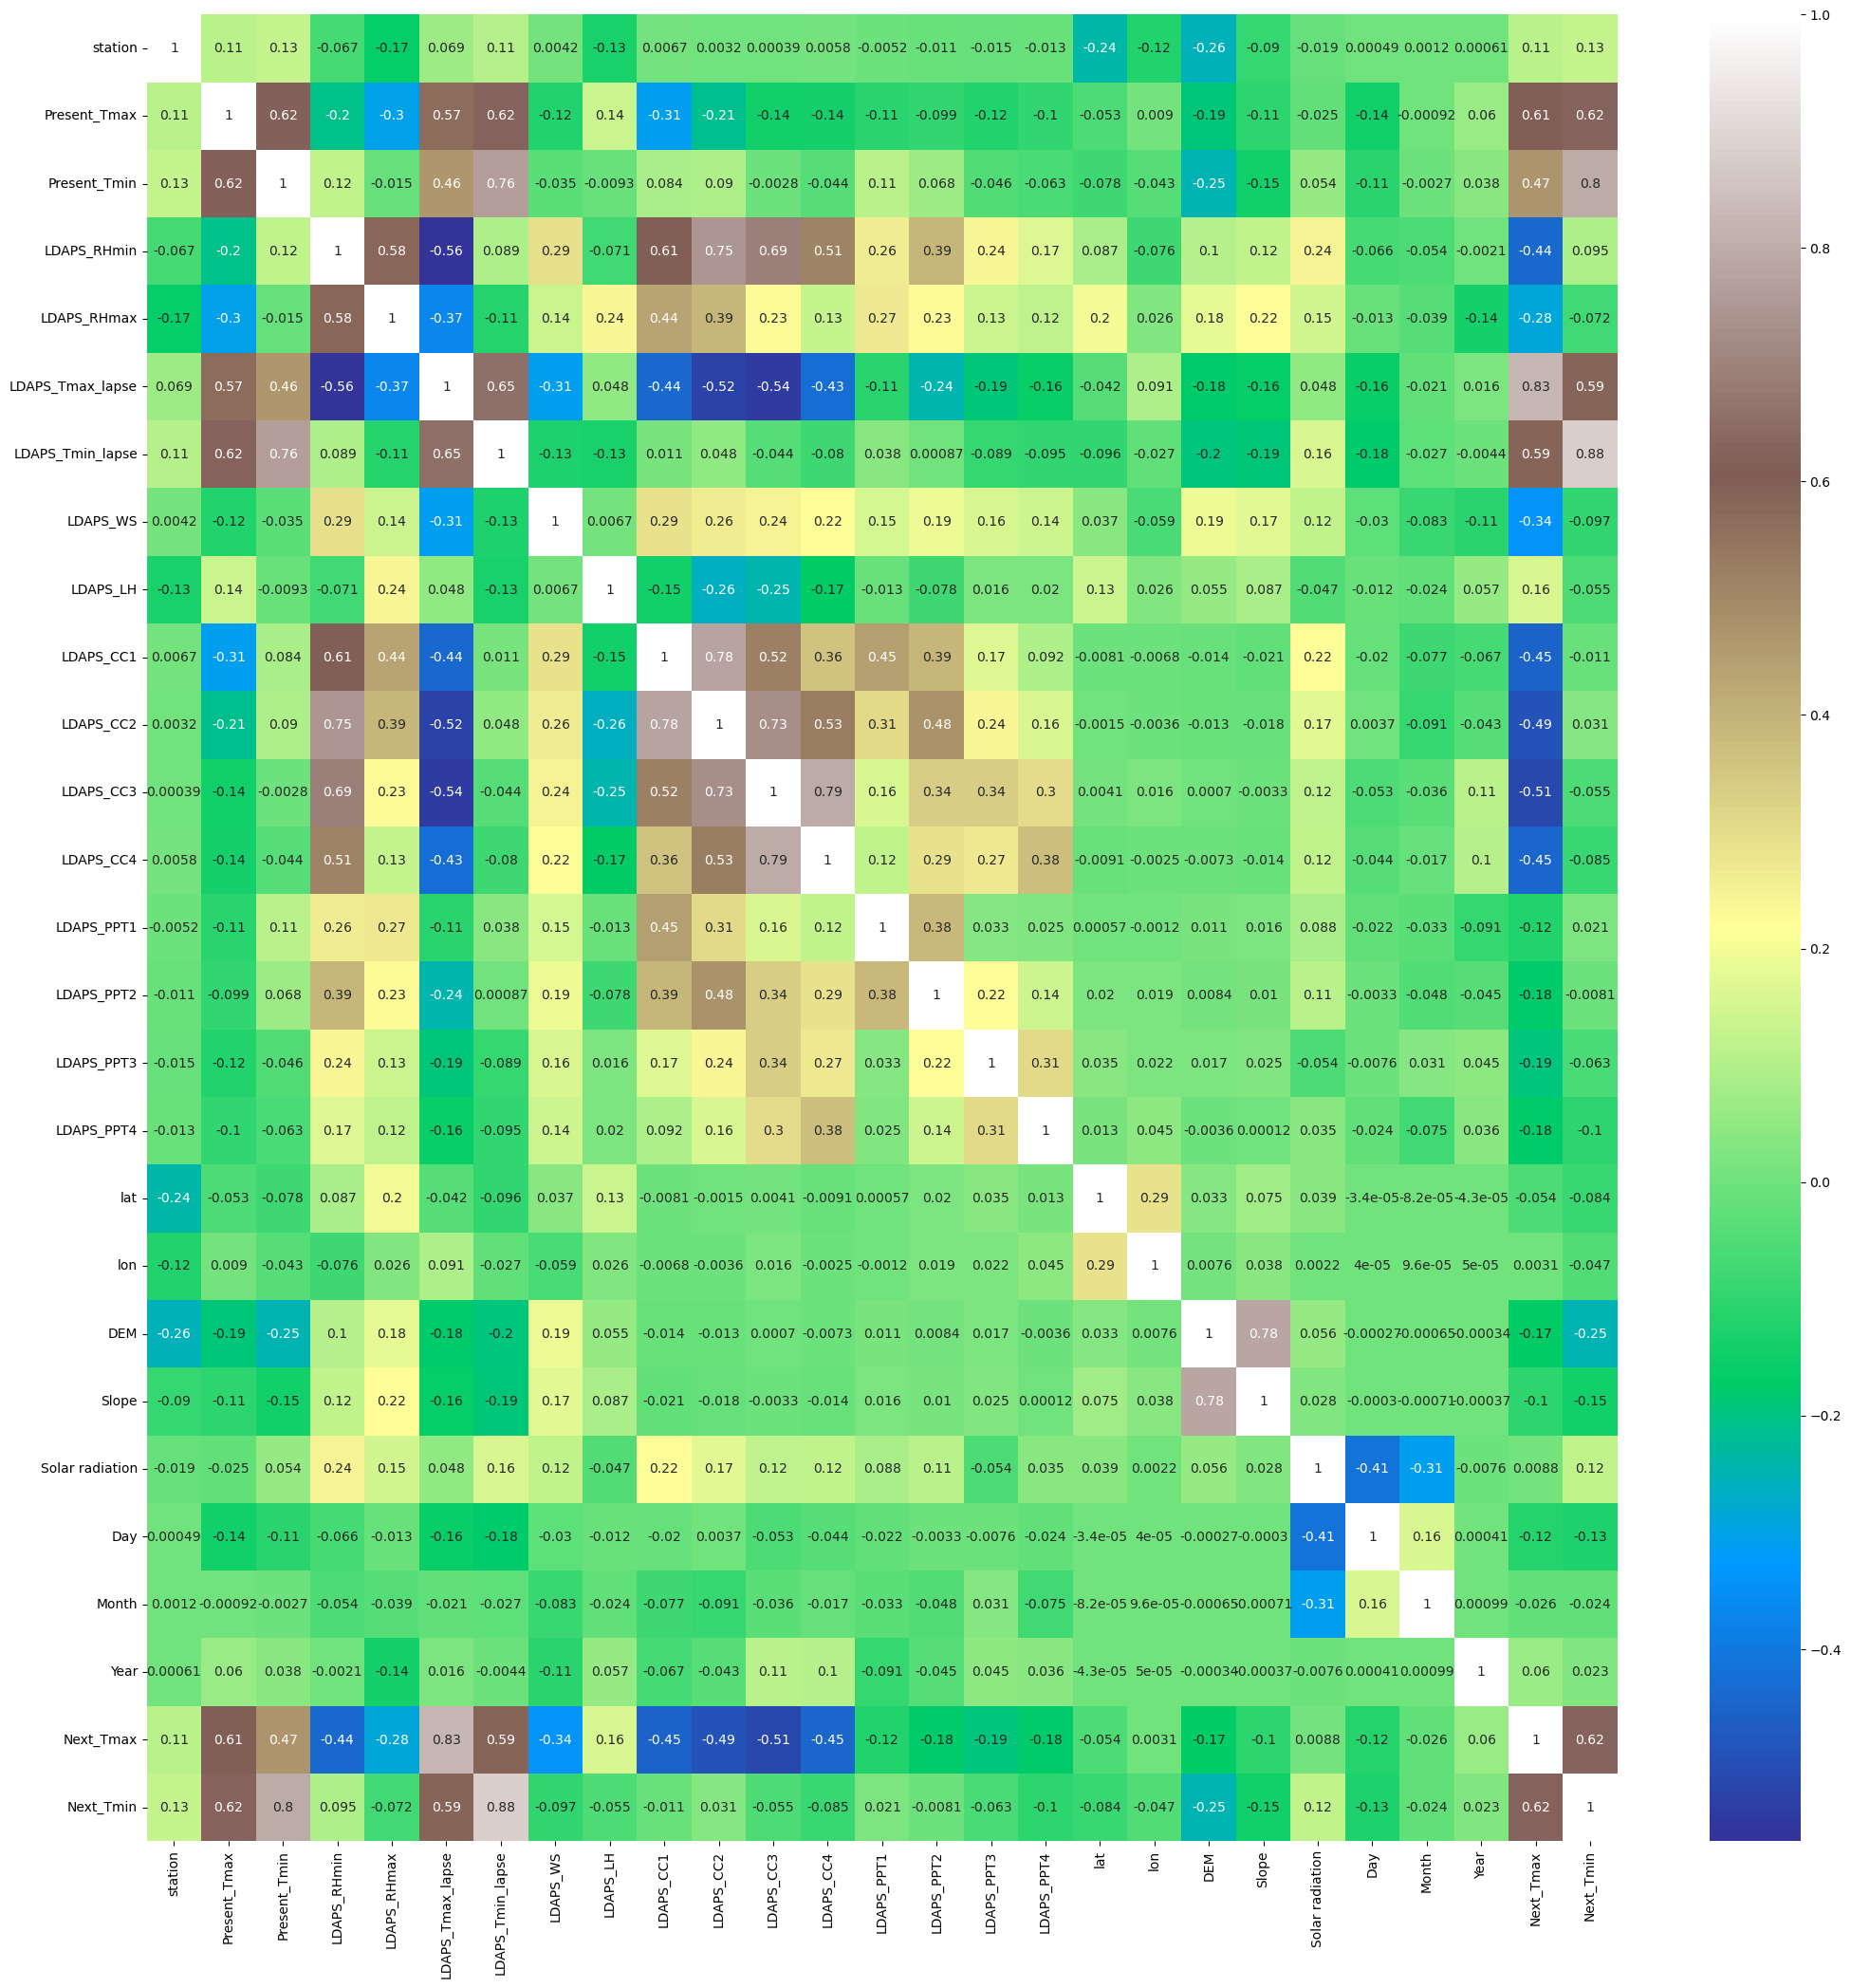

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(dfcor,annot=True,cmap='terrain')

Both the Target Variables are more or less corelated with all other Features either possitively or negatively.

In [36]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,16.368550,7.079076,2014.999484,30.274887,22.932220
std,7.213213,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,8.241642,2.240205,1.414487,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,7.000000,1.000000,2013.000000,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,8.000000,7.000000,2014.000000,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,16.000000,7.000000,2015.000000,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,24.000000,8.000000,2016.000000,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,31.000000,12.000000,2017.000000,38.900000,29.800000


We are observing that the differences between Mean & Median (50% Percentile) are very little of almost all the columns. In some features the standard deviationj are high, so these are the spreaded data. The differences between Minimum value and 25% Percentile and 75% Percentile & Maximum values are very high of some of the Features, so huge outliers possibilites are there of those features.

In [37]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Day                 0.245892
Month              -0.706382
Year                0.000365
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

The Skewness are also above 1 of some of the Features.

station                AxesSubplot(0.125,0.747241;0.110714x0.132759)
Present_Tmax        AxesSubplot(0.257857,0.747241;0.110714x0.132759)
Present_Tmin        AxesSubplot(0.390714,0.747241;0.110714x0.132759)
LDAPS_RHmin         AxesSubplot(0.523571,0.747241;0.110714x0.132759)
LDAPS_RHmax         AxesSubplot(0.656429,0.747241;0.110714x0.132759)
LDAPS_Tmax_lapse    AxesSubplot(0.789286,0.747241;0.110714x0.132759)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.587931;0.110714x0.132759)
LDAPS_WS            AxesSubplot(0.257857,0.587931;0.110714x0.132759)
LDAPS_LH            AxesSubplot(0.390714,0.587931;0.110714x0.132759)
LDAPS_CC1           AxesSubplot(0.523571,0.587931;0.110714x0.132759)
LDAPS_CC2           AxesSubplot(0.656429,0.587931;0.110714x0.132759)
LDAPS_CC3           AxesSubplot(0.789286,0.587931;0.110714x0.132759)
LDAPS_CC4              AxesSubplot(0.125,0.428621;0.110714x0.132759)
LDAPS_PPT1          AxesSubplot(0.257857,0.428621;0.110714x0.132759)
LDAPS_PPT2          AxesSubplot(0.

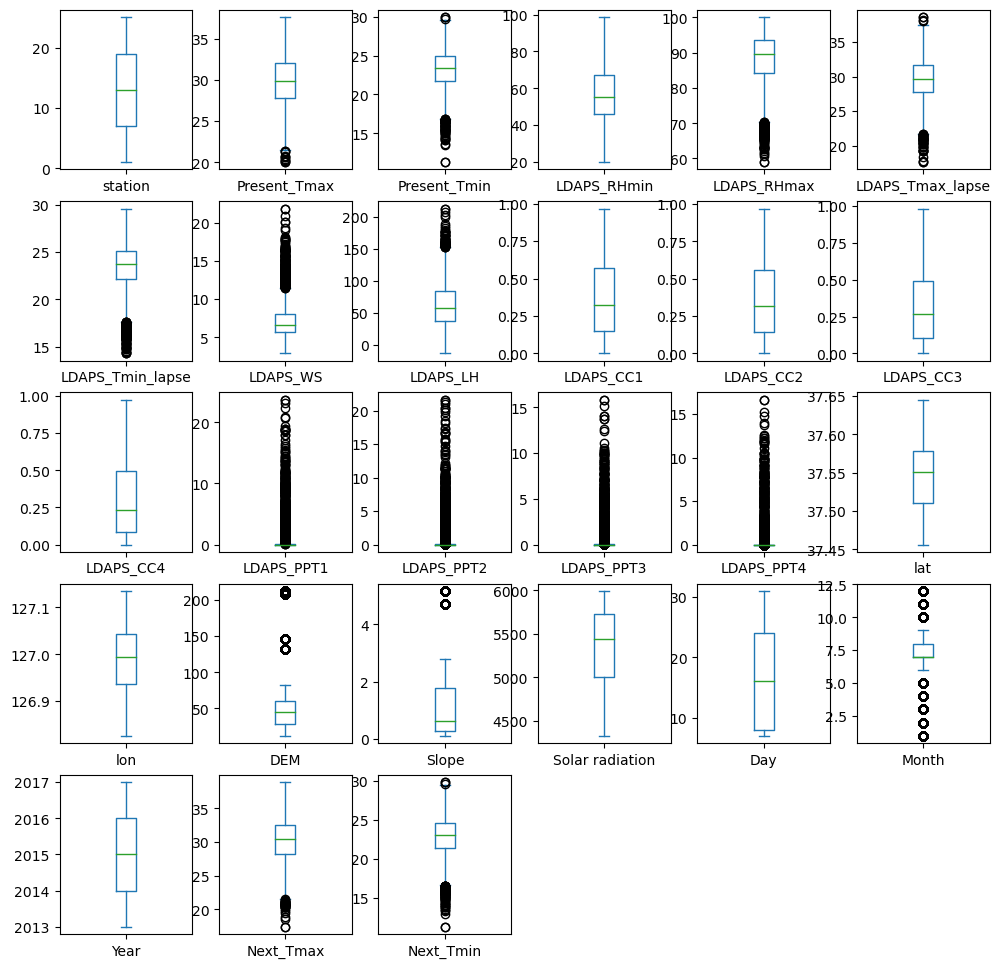

In [38]:
df.plot(kind='box',figsize=(12,12),layout=(5,6),subplots=True)

By using above boxplot also, we found that there are Outliers in some of the features.

For the skewness & outliers, we are further checking the same by some more graphical analysis and trying to normally distibute the same via boxcox method.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

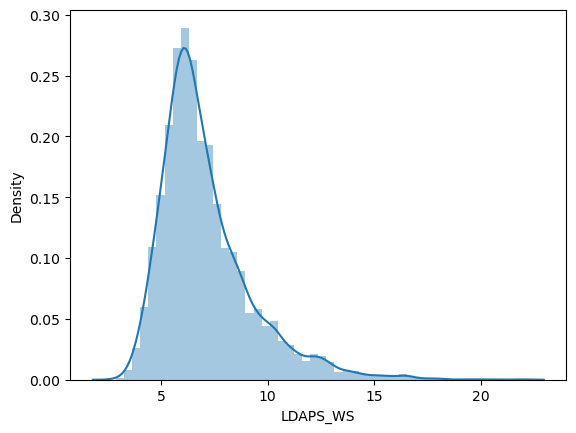

In [39]:
sns.distplot(df['LDAPS_WS'])

In [40]:
df['LDAPS_WS']=boxcox(df['LDAPS_WS'],0)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

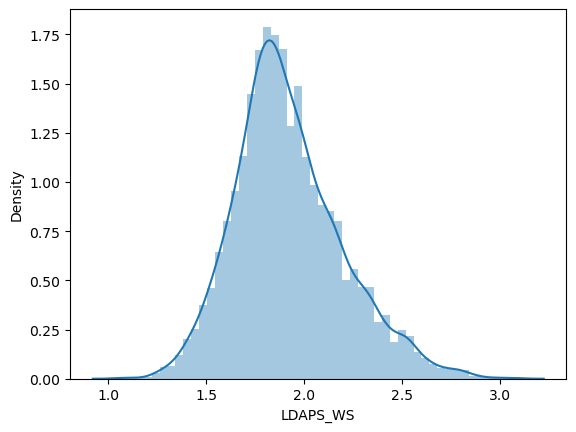

In [41]:
sns.distplot(df['LDAPS_WS'])

In [42]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Day                 0.245892
Month              -0.706382
Year                0.000365
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

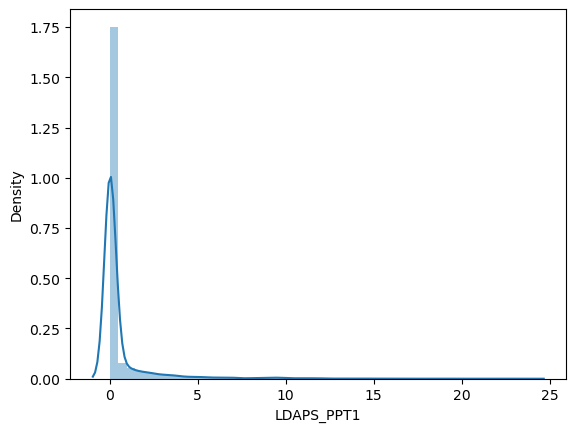

In [43]:
sns.distplot(df['LDAPS_PPT1'])

In [44]:
df['LDAPS_PPT1']=boxcox(df['LDAPS_PPT1'],0.5)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

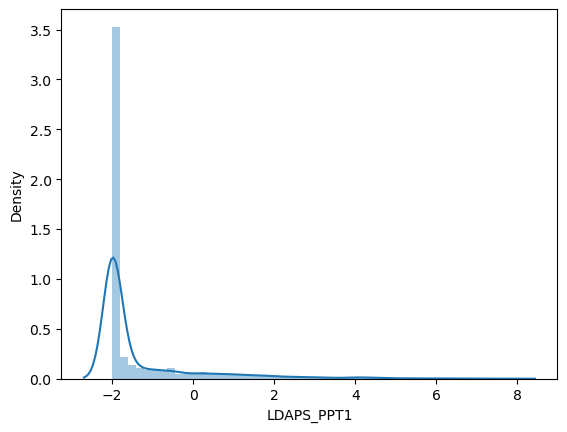

In [45]:
sns.distplot(df['LDAPS_PPT1'])

In [46]:
df['LDAPS_PPT1']=boxcox(df['LDAPS_PPT1'],0.5)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

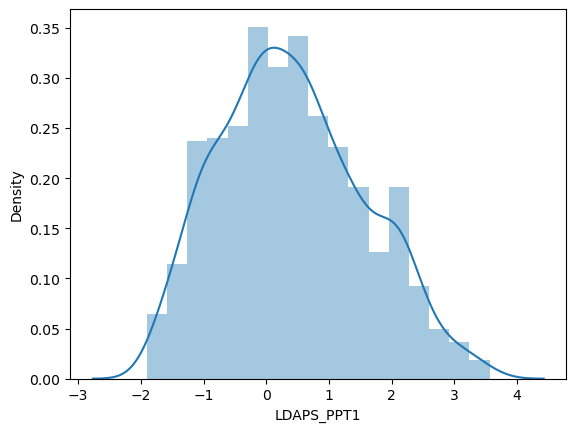

In [47]:
sns.distplot(df['LDAPS_PPT1'])

In [48]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          0.310196
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Day                 0.245892
Month              -0.706382
Year                0.000365
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [49]:
df['LDAPS_PPT2']=boxcox(df['LDAPS_PPT2'],0.5)

In [50]:
df['LDAPS_PPT2']=boxcox(df['LDAPS_PPT2'],0.5)

In [51]:
df['LDAPS_PPT3']=boxcox(df['LDAPS_PPT3'],0.5)

In [52]:
df['LDAPS_PPT3']=boxcox(df['LDAPS_PPT3'],0.5)

In [53]:
df['LDAPS_PPT4']=boxcox(df['LDAPS_PPT4'],0.5)

In [54]:
df['LDAPS_PPT4']=boxcox(df['LDAPS_PPT4'],0.5)

In [55]:
df['DEM']=boxcox(df['DEM'],0.5)

In [56]:
df['DEM']=boxcox(df['DEM'],0.5)

In [57]:
df['Slope']=boxcox(df['Slope'],0.5)

In [58]:
df.isna().sum()

station                0
Present_Tmax           0
Present_Tmin           0
LDAPS_RHmin            0
LDAPS_RHmax            0
LDAPS_Tmax_lapse       0
LDAPS_Tmin_lapse       0
LDAPS_WS               0
LDAPS_LH               0
LDAPS_CC1              0
LDAPS_CC2              0
LDAPS_CC3              0
LDAPS_CC4              0
LDAPS_PPT1          6742
LDAPS_PPT2          7017
LDAPS_PPT3          7264
LDAPS_PPT4          7293
lat                    0
lon                    0
DEM                    0
Slope                  0
Solar radiation        0
Day                    0
Month                  0
Year                   0
Next_Tmax              0
Next_Tmin              0
dtype: int64

After boxcox transformation, again missing values arrises in 4 columns of our dataset as above. So again we are going to fill these missing values by respective columns Mean.

In [59]:
df.fillna(df.mean(),inplace=True)

In [60]:
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Day                 0
Month               0
Year                0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [61]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          0.858263
LDAPS_PPT2         -0.125141
LDAPS_PPT3          0.505170
LDAPS_PPT4          0.626753
lat                 0.087062
lon                -0.285213
DEM                 0.735615
Slope               0.871432
Solar radiation    -0.511210
Day                 0.245892
Month              -0.706382
Year                0.000365
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

station                AxesSubplot(0.125,0.747241;0.110714x0.132759)
Present_Tmax        AxesSubplot(0.257857,0.747241;0.110714x0.132759)
Present_Tmin        AxesSubplot(0.390714,0.747241;0.110714x0.132759)
LDAPS_RHmin         AxesSubplot(0.523571,0.747241;0.110714x0.132759)
LDAPS_RHmax         AxesSubplot(0.656429,0.747241;0.110714x0.132759)
LDAPS_Tmax_lapse    AxesSubplot(0.789286,0.747241;0.110714x0.132759)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.587931;0.110714x0.132759)
LDAPS_WS            AxesSubplot(0.257857,0.587931;0.110714x0.132759)
LDAPS_LH            AxesSubplot(0.390714,0.587931;0.110714x0.132759)
LDAPS_CC1           AxesSubplot(0.523571,0.587931;0.110714x0.132759)
LDAPS_CC2           AxesSubplot(0.656429,0.587931;0.110714x0.132759)
LDAPS_CC3           AxesSubplot(0.789286,0.587931;0.110714x0.132759)
LDAPS_CC4              AxesSubplot(0.125,0.428621;0.110714x0.132759)
LDAPS_PPT1          AxesSubplot(0.257857,0.428621;0.110714x0.132759)
LDAPS_PPT2          AxesSubplot(0.

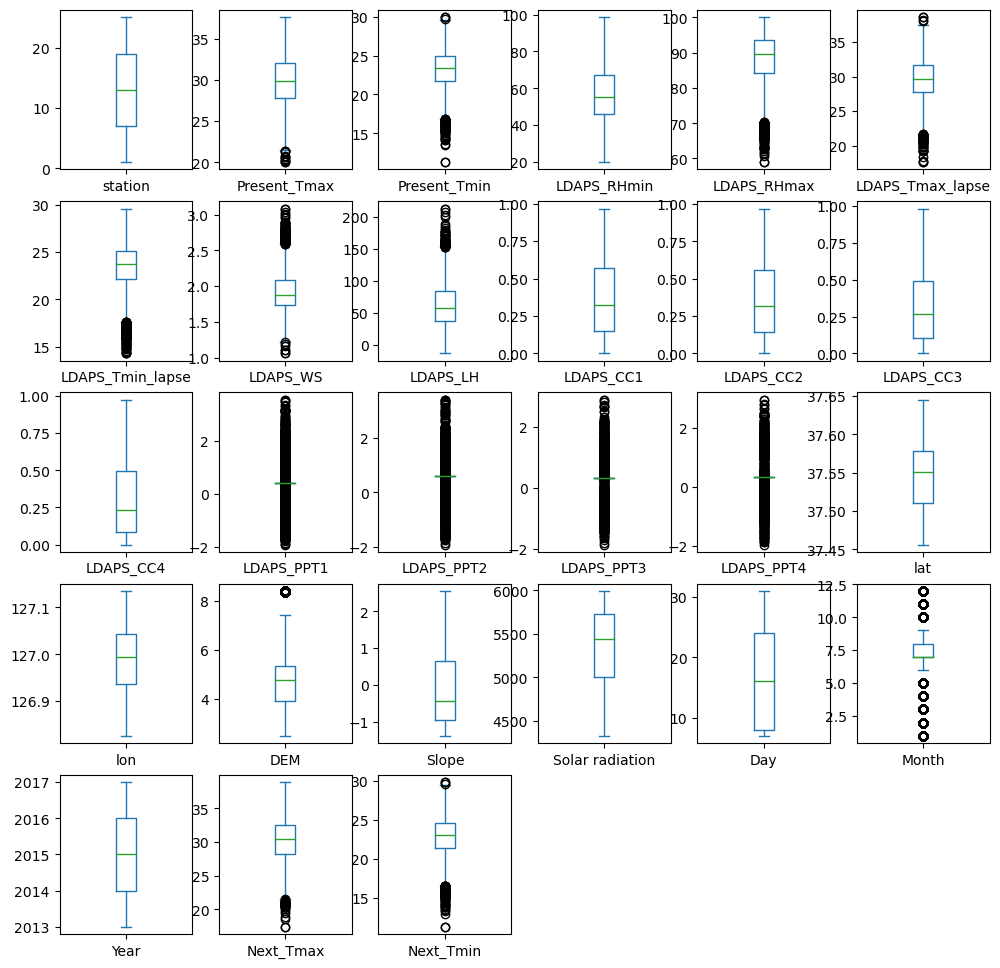

In [62]:
df.plot(kind='box',figsize=(12,12),layout=(5,6),subplots=True)

For the Features having the large number of Outliers & Skewness, we have reduced the same by using boxcox transformation method.

As we have to predict 2 different continuous value Targets (i.e. Linear Regression type Model) for Next Days Maximum & Minimum Tempretures, we are saving our df in 2 separate variables, by eliminating the Next daty Min. Temp. for Max. Temp. prediction and vice versa for for the Min. Temp. prediction.

In [63]:
mintarget=df.pop('Next_Tmin')

In [64]:
Maxdf=df

In [65]:
Mindf=df.drop(['Next_Tmax'], axis=1)

In [66]:
Maxdf.sample()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax
1814,15.0,33.1,23.9,40.603157,88.531418,30.96618,23.385347,2.078295,36.295879,0.098757,...,0.318421,37.5507,126.937,3.987627,-0.15046,5787.470703,7,10,2014,33.5


In [67]:
Mindf.insert(25,'Next_Tmin',mintarget)

In [68]:
Mindf.sample()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmin
4511,12.0,23.3,18.9,57.420921,85.674149,23.195549,18.436862,1.819248,38.26482,0.320831,...,0.318421,37.5507,126.988,7.162646,-0.45974,4699.08252,25,8,2015,17.9


First we are going to build Next days Max Tempreture ML Model

In [69]:
Maxdf

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,...,0.318421,37.6046,126.991,8.419873,1.337664,5992.895996,30,6,2013,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,...,0.318421,37.6046,127.032,4.747130,-0.565985,5869.312500,30,6,2013,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,20.573050,0.209344,...,0.318421,37.5776,127.058,4.178158,-0.968302,5863.555664,30,6,2013,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,65.727144,0.216372,...,0.318421,37.6450,127.022,4.789027,1.184211,5856.964844,30,6,2013,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,107.965535,0.151407,...,0.318421,37.5507,127.135,4.273302,-0.578030,5859.552246,30,6,2013,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.816276,72.058294,0.030034,...,0.318421,37.5372,126.891,2.856430,-1.211584,4443.313965,30,8,2017,28.3
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.878368,47.241457,0.035874,...,0.318421,37.5237,126.909,3.026966,-1.057026,4438.373535,30,8,2017,28.6
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,1.986403,9.090034,0.048954,...,0.318421,37.5237,126.970,3.234827,-0.958271,4451.345215,30,8,2017,27.8
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,1.058686,-13.603212,0.000000,...,0.318421,37.4562,126.826,2.487406,-1.372387,4329.520508,7,1,2013,17.4


In [70]:
Maxdf.shape

(7752, 26)

For making Max Temp. model, we have already droped the Min Temp. column, as we have to train our ML model like, it is Predictiing today for the Next Day Maximum Tempreture, so it assumes that it is having niether Max nor Min Temp. data of the next day, while it will Predict the same on our test data.

Now separating our Maxdf into Independent & Target variables

In [71]:
ax=Maxdf.iloc[:,0:-1]

In [72]:
ay=Maxdf.iloc[:,-1]

In [73]:
ax.shape

(7752, 25)

In [74]:
ay.shape

(7752,)

In [75]:
lr=LinearRegression()

In [76]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    lr.fit(axtrain,aytrain)
    apred1=lr.predict(axtest)
    rscore=r2_score(aytest,apred1)
    print(rscore)

0.7740439082403026
0.7783579506404295
0.7506335214235107
0.7678236670384393
0.7762296869681857
0.7683334631644221
0.7702207301682866
0.7686688758068045
0.7515091597782807
0.7785877471472135
0.766061964709092
0.7600205792163447
0.7739917216678844
0.7613855218566659
0.7719642268167713
0.7516804991338775
0.7649578965134505
0.7588598835582433
0.7545056135161605
0.7515949397998131
0.7623148127187468
0.7695179723185418
0.7497347202072313
0.7735821205608785
0.7760564583270487
0.7602951261679088
0.7695468201096411
0.7591088171365719
0.762098636922303
0.764257248464852
0.7716921987660454
0.7499364713254465
0.7607664118183575
0.7582314441700341
0.7671398417173807
0.7462395448040111
0.7710561302919259
0.7655161310393289
0.7704268643349322
0.7715216690759751
0.7751519912436927
0.7664936280605299
0.7699107384986718
0.7793804633451381
0.7596814539055999
0.7662578850917303
0.7667814880814948
0.7565841221387294
0.7691496618274327
0.7648152685294183


In [77]:
dt=DecisionTreeRegressor()

In [78]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    dt.fit(axtrain,aytrain)
    apred2=dt.predict(axtest)
    rscore=r2_score(aytest,apred2)
    print(rscore)

0.7744981199781059
0.7706752710091099
0.7757724386777676
0.7733344807465156
0.7852876730169758
0.7902573662988424
0.7840719314429004
0.7569992405050523
0.7669044939451448
0.7672760022165112
0.7837618794920809
0.7652798708714439
0.7904612148559961
0.7588364343841247
0.7698434332169586
0.767478299533976
0.7713452970976467
0.7618663389279159
0.766467242778331
0.776215200555149
0.7695390405857347
0.7740069366549299
0.7722650038509402
0.7889643456567192
0.798003286378946
0.7634873448144135
0.8000431261414549
0.7915097497576037
0.7790417823962578
0.7613489140520757
0.7560916076986505
0.7633580162467286
0.7852306965069864
0.7716217618433137
0.7775335648606067
0.7789332763256197
0.7940614990656432
0.7909881558179218
0.7991929442980881
0.7764756679872004
0.790655919913986
0.7800383925835942
0.7747936094163932
0.7584269148879392
0.7708357865358664
0.7840877528694576
0.7619241603492743
0.740866988314907
0.8025126280453735
0.7715547477950276


In [79]:
br=BayesianRidge()

In [80]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    br.fit(axtrain,aytrain)
    apred3=br.predict(axtest)
    rscore=r2_score(aytest,apred3)
    print(rscore)

0.7739796899346941
0.7781721165531071
0.7510361231546561
0.7676767734578299
0.775903957416829
0.7682848262366722
0.770449632161434
0.7684111031928624
0.7514267624090618
0.778847765133218
0.7659842425879111
0.7596099374881133
0.7738682090179811
0.7611209791017189
0.7720315072819746
0.7521791385115861
0.7649542193003127
0.7588142003652412
0.7546307186883876
0.751803881967094
0.7622817012883506
0.7693294655962952
0.749882109610974
0.7737479791277995
0.7758590258774933
0.7603036312297604
0.7694112809424649
0.7594334553953581
0.7620018223829914
0.7640858889531621
0.771889434184965
0.7498447882125702
0.7608640486801925
0.7584748543571694
0.7671817931897069
0.7459731990641296
0.7711857227139693
0.765680742124124
0.7706633866215571
0.7714902557874691
0.77503282763091
0.7665531898809105
0.7696643049884886
0.7792863384846361
0.7598498419476777
0.7661891110854785
0.7666799308025289
0.7566586892523413
0.7690671453214839
0.764693936491417


In [81]:
gb=GradientBoostingRegressor()

In [82]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    gb.fit(axtrain,aytrain)
    apred4=gb.predict(axtest)
    rscore=r2_score(aytest,apred4)
    print(rscore)

0.8538359343596934
0.8447359314558316
0.844899782754259
0.8491297158940123
0.8589791999204105
0.8538233090584041
0.8569666453088667
0.8491248051560429
0.8426540725864857
0.862724795524651
0.8511371196073885
0.8491302754736934
0.852423380361924
0.8450950150645712
0.8555489917896051
0.8397720262824446
0.8458308458718052
0.8500661990674361
0.8476288149929669
0.8483223619845962
0.8489237835717747
0.8541422465498805
0.840757399917203
0.8568720500959219
0.8631015254831418
0.8474804666458238
0.8582774947408593
0.8419357325021289
0.853572493061259
0.8482734447268886
0.8533355252740137
0.846297722253835
0.8512885235466393
0.8497309393942042
0.8505802615220633
0.839653768109283
0.8526385761234455
0.8503537157191479
0.8520244846183248
0.8529051045827537
0.8588928466887984
0.8518988162347401
0.856580245417064
0.8550793581048658
0.8466486120752856
0.8462135737089145
0.8480351107921841
0.8509914459901159
0.8520069121855498
0.8484478729427845


In [83]:
kn=KNeighborsRegressor()

In [84]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    kn.fit(axtrain,aytrain)
    apred5=kn.predict(axtest)
    rscore=r2_score(aytest,apred5)
    print(rscore)

0.5669977295889082
0.5582486601967365
0.5713262180194295
0.5780241254404075
0.5580810282618235
0.5802304534769541
0.5468712745320243
0.5797459871974489
0.5530138328323007
0.593819496605877
0.5392947377658638
0.5589222433545962
0.557345396901546
0.5826831257550167
0.6033436089889899
0.5483022376236101
0.5720385631994689
0.5585085598677044
0.578616598783614
0.5412537787677505
0.5605679756704891
0.5440464320766499
0.5624251644682631
0.5699630998237941
0.5899965195206623
0.5824339689565176
0.5817868921153819
0.5383720435598552
0.5762249524140608
0.545831238793243
0.5685685089645197
0.5422459156649144
0.5678996536852923
0.5593417516811718
0.5740288531119003
0.5733539000963451
0.5509899749328746
0.5726385010545874
0.5773505769033919
0.5739214340659027
0.5678770239733479
0.5769963730217218
0.558283532996273
0.5751698845163358
0.5616170865127209
0.5839504274006038
0.5561566336749106
0.5485048287814993
0.5651156097977819
0.5741709692876698


In [85]:
ar=AdaBoostRegressor()

In [86]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    ar.fit(axtrain,aytrain)
    apred6=ar.predict(axtest)
    rscore=r2_score(aytest,apred6)
    print(rscore)

0.7711641397421731
0.738319786682259
0.7443609376673719
0.7458112754018225
0.7650389627889719
0.7434662060063211
0.7492401597861207
0.7500961910948312
0.7481623088094225
0.7651537279279113
0.7543424025067308
0.7446351706394851
0.7612828446444475
0.7449264075261008
0.7660513504478753
0.7440587993448322
0.7607882551312655
0.7247768711617387
0.753640357415413
0.7527269670473828
0.7433906920212296
0.7631089936079969
0.747108467225999
0.7664479914627456
0.7630502749146133
0.756068604738228
0.7596993437554872
0.7611232163819848
0.7511781474969363
0.7524529171954216
0.7566039127800308
0.7532061460520457
0.743950402673641
0.759800486574933
0.7571795054193196
0.73908980552994
0.7504221788038208
0.764844518276153
0.7533799318587164
0.7438826466845336
0.7516276811032812
0.7484911795876554
0.756793277529373
0.7651529021874369
0.7509276417472357
0.7519053789043925
0.7505378002088996
0.7317650287719668
0.7612457234135426
0.7394209058703722


In [87]:
rf=RandomForestRegressor()

In [88]:
for i in range(0,50):
    axtrain,axtest,aytrain,aytest=train_test_split(ax,ay,test_size=0.30,random_state=i)
    rf.fit(axtrain,aytrain)
    apred7=rf.predict(axtest)
    rscore=r2_score(aytest,apred7)
    print(rscore)

0.9024584712539925
0.9042754483197475
0.8959352308425934
0.8990079013550238
0.9047711907496395
0.9083859617780602
0.9090436318323868
0.90600438257826
0.8987900807982787
0.9054287869526499
0.9058935266409833
0.9034531341635119
0.9059132747747495
0.8991359779481821
0.9034262764479514
0.8997093137040855
0.9030323277528871
0.8950644118537865
0.8954696343350813
0.9017865532756187
0.8985321370246828
0.9053915740237931
0.8975339753519131
0.9068580402116334
0.9114485196530803
0.90004166206291
0.9048225413334313
0.8967900389846596
0.9006899737742821
0.9025562060599222
0.9041004066367966
0.8976809704814152
0.9001398012144668
0.9029625591163507
0.9011456246589832
0.896081071082902
0.9039762992454827
0.9050420512475912
0.9018542480838834
0.9043856700230679
0.9089124144890393
0.9054797791509178
0.9080764988530862
0.9031979551973088
0.8988826422021207
0.9070837862253118
0.9020011282590737
0.9034029780964439
0.9044807314953605
0.8966154079997697


By applying above linear Algos, we found that the Random Forest Regressor (rf) is giving more accurate predictions above 90%

In [89]:
mean_absolute_error(aytest,apred7)

0.729429777636789

In [90]:
mean_squared_error(aytest,apred7)

1.0134577640342985

We are getting less error with Random Forest Regressor

In [91]:
cv1=cross_val_score(rf,ax,ay,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=6))

In [92]:
cv1

array([0.90264576, 0.90525023, 0.89880318, 0.90202033, 0.90497845,
       0.8987553 ])

In [93]:
cv1.mean()

0.9020755436777975

By using Cross Validation Suffle Split with 6 splits and with 70% training & 30% testing data also we are getting at very good prediction above 90%

In [94]:
gs=GridSearchCV(estimator=rf,param_grid={'n_estimators':[200],'max_depth':[20],'max_features':['sqrt'],'min_samples_leaf':[5],'min_samples_split':[5],'bootstrap':[False]},scoring='accuracy',cv=5)

In [95]:
gs.fit(axtrain,aytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [5], 'n_estimators': [200]},
             scoring='accuracy')

In [96]:
Maxpred=gs.best_estimator_.predict(axtest)

In [97]:
r2_score(aytest,Maxpred)

0.9078941653809625

In [98]:
mean_squared_error(aytest,Maxpred)

0.9028944391183035

In [99]:
mean_absolute_error(aytest,Maxpred)

0.6976094282039695

By using applying the Hyperparameter Tuning with the best fit Param Grids on our dataset to predict Max. Temp., we are getting a good prediction accuracy above 90% with minimum erros. So we are going to save this Hyper Model for the Next Day's Max. Temp. Target.

In [100]:
pickle.dump(gs, open('Next Days Max Temp', 'wb'))

In [101]:
max_temp_model=pickle.load(open('Next Days Max Temp', 'rb'))

In [102]:
max_temp_model_pred=max_temp_model.predict(axtest)

In [103]:
r2_score(aytest,max_temp_model_pred)

0.9078941653809625

In [104]:
mean_squared_error(aytest,max_temp_model_pred)

0.9028944391183035

In [105]:
mean_absolute_error(aytest,max_temp_model_pred)

0.6976094282039695

We are getting a good prediction accuracy above 90% with minimum errors via our saved Hyper ML Model of Random Forest Regressor.

Now we are going to make of next ML Model for the prediction of Next Day's Minimum Tempreture forecast.

In [106]:
Mindf.shape

(7752, 26)

In [107]:
Mindf.sample()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,Next_Tmin
7184,10.0,29.4,22.9,49.64296,85.65934,31.343114,23.809171,2.058245,69.941383,0.326395,...,0.318421,37.4562,126.955,8.369097,2.551132,5179.303223,8,8,2017,22.3


As we have already did the required data preprocessing and feature engineering works, and checked our dataset with different regression algos & random states and found the Random Forest Regressor as the best Algorithm giving above 90% accurate prediction of Next Day's Maximum Tempreture. So for prediction of Next Day's Minimum Tempreture, our dataset is same the only difference is of our Target variable that is "Next_Tmin" in place of "Next_Tmax" and that is also of same continuous value type. So we are going to use our best Random Forest Regressor for the prediction of Next Day's Minimum Tempreture also.

First separating our Mindf into Independent & Target variables.

In [108]:
ix=Mindf.iloc[:,0:-1]

In [109]:
iy=Mindf.iloc[:,-1]

In [110]:
ix.shape

(7752, 25)

In [111]:
iy.shape

(7752,)

In [112]:
for i in range(0,50):
    ixtrain,ixtest,iytrain,iytest=train_test_split(ix,iy,test_size=0.30,random_state=i)
    rf.fit(ixtrain,iytrain)
    ipred1=rf.predict(ixtest)
    rscore=r2_score(iytest,ipred1)
    print(rscore)

0.9008657066627634
0.8985624912203223
0.8963992677003308
0.8994577143980028
0.9031342093642089
0.9019123059357443
0.9020303659327422
0.9029416347090486
0.9046935092575809
0.9055467531139907
0.9054252729272471
0.9013750374833799
0.9049721147917196
0.8928262848093776
0.8971752216245757
0.8973603345121348
0.9006687195981443
0.9072737585487709
0.8966982832242767
0.8948467448532268
0.9022280761029168
0.9047182361641335
0.8966171213338456
0.8976065838318043
0.9032745694674763
0.9001278674180017
0.8989382421705727
0.8940562708804305
0.8895191569886716
0.9063367539651399
0.8993603944481153
0.897825016832891
0.9016540689820156
0.9004675129525883
0.8969648774364585
0.9043178033596431
0.9103035970906902
0.9033699053767554
0.9037395824602149
0.8973825291056703
0.9060185621660962
0.9079808301777703
0.8986585759143049
0.899925011080289
0.9019184156165508
0.8968755141931093
0.8954220919309889
0.8963472649605564
0.8989328717887262
0.8977188982217202


In [113]:
mean_squared_error(iytest,ipred1)

0.6156105897905332

In [114]:
mean_absolute_error(iytest,ipred1)

0.5798664731597504

We are getting a good predictions near 90% accuracy with many random states for our Minimum Tempreture forecast also by using Random Forest Regressor, with minimum Mean Squared & Mean Absolute Errors.

In [115]:
cv2=cross_val_score(rf,ix,iy,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=6))

In [116]:
cv2

array([0.89964309, 0.90069406, 0.91276957, 0.89926373, 0.90588514,
       0.89854406])

In [117]:
cv2.mean()

0.902799942161228

The Cross Validation of our Mindf dataset is also giving above 89% accurate predicitons.

We would like to check our second best Regression Algorithm Gradient Boosting Regressor also for the Min. Temp. prediction.

In [118]:
for i in range(0,50):
    ixtrain,ixtest,iytrain,iytest=train_test_split(ix,iy,test_size=0.30,random_state=i)
    gb.fit(ixtrain,iytrain)
    ipred2=gb.predict(ixtest)
    rscore=r2_score(iytest,ipred2)
    print(rscore)

0.8848576278491673
0.8878582665068188
0.8819835086410218
0.8833329993638723
0.8871437124459944
0.8820319630777371
0.886577293893139
0.8865100268426931
0.8858512061276798
0.8889239285041471
0.8875414341072452
0.8828725695313685
0.8846939005359519
0.8720686916885225
0.8767257358392045
0.8764342070772773
0.879679738382799
0.887509764448563
0.8799857821317915
0.8738860112965716
0.8830506366764724
0.8868667123929889
0.8751895046088596
0.882166941912297
0.884345187285057
0.8839662778265817
0.88315325129396
0.8749989422901396
0.8711325410497192
0.8886083706027919
0.886623516481333
0.8743458648278972
0.8779289236185238
0.8828023678098551
0.8775470332278157
0.8845964559811575
0.8910832936866934
0.8844900503111912
0.885633412972484
0.8799590886654243
0.8875868661470614
0.8865633143808443
0.8845068809555626
0.884896924751378
0.879206134591171
0.8808463961581384
0.8808371584775245
0.8815517968311596
0.880647387617581
0.8809219483482517


In [119]:
mean_squared_error(iytest,ipred2)

0.7167082514162694

In [120]:
mean_absolute_error(iytest,ipred2)

0.6412486378367331

We are getting a good prediction accuracy above 89% with minimum errors via Gradient Boosting Regressor also, but found our Random Forest Regressor is the best Algo for Next Day's Minimum Tempreture Predictions.

As our previous Hyperparameter Tuning model with best fit Param Grids was giving good results. We are going to apply the same Hyper Tuning Parameters for the Prediction of Next Day's Minimum Tempreture also, to check the results of this dataset.

In [121]:
gs.fit(ixtrain,iytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [5], 'n_estimators': [200]},
             scoring='accuracy')

In [122]:
Minpred=gs.best_estimator_.predict(ixtest)

In [123]:
r2_score(iytest,Minpred)

0.9054910566184805

In [124]:
mean_squared_error(iytest,Minpred)

0.5688314396700457

In [125]:
mean_absolute_error(iytest,Minpred)

0.5575703740207489

By applying the same Hyperparameter Tuning in our Minimum Tempreture prediction dataset, we got a more better results with prediction accuracy of above 90% with minimum errors. So we are going to save the same Hyper Model of Random Forest Regressor for the prediction of Next Day's Minimum Tempreture also.

In [126]:
pickle.dump(gs, open('Next Days Min Temp', 'wb'))

In [127]:
min_temp_model=pickle.load(open('Next Days Min Temp', 'rb'))

In [128]:
min_temp_model_pred=min_temp_model.predict(ixtest)

In [129]:
r2_score(iytest,min_temp_model_pred)

0.9054910566184805

In [130]:
mean_squared_error(iytest,min_temp_model_pred)

0.5688314396700457

In [131]:
mean_absolute_error(iytest,min_temp_model_pred)

0.5575703740207489

By using our saved ML Model for the prediction of Next Day's Minimum Tempreture, we are getting a very good prediction accuracy above 90% with minimum errors.